In [ ]:
# RNN(Recurrent Neural Network) 모델을 구현하는 예제 코드입니다.
# 이 코드는 IMDB 영화 리뷰 감정 분석 데이터셋을 사용하여, RNN을 학습하고 감정을 예측하는 과정

영화 리뷰 감정분석

# 영화리뷰 감정분석

## 라이브러리

In [ ]:
# 필요한 라이브러리 임포트
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

## 하이퍼파라미터 설정

In [ ]:
max_features = 10000  # 사용할 단어의 최대 개수 (상위 10,000개 단어 사용)
maxlen = 100  # 각 리뷰의 최대 길이 (100개의 단어로 제한)

## 데이터 로드 및 전처리

In [ ]:
# imdb.load_data() 함수를 사용해 IMDB 영화 리뷰 데이터셋을 로드합니다.
# 이 데이터셋은 이진 분류 문제로, 영화 리뷰가 긍정인지 부정인지 예측하는 문제입니다.
# 각 리뷰는 단어의 시퀀스로 표현되며, 최대 10,000개의 상위 단어만 사용합니다.
# 리뷰 길이가 다르므로, pad_sequences를 사용하여 각 리뷰를 100개의 단어로 맞춥니다.
# 길이가 100보다 짧은 리뷰는 패딩을 추가하고, 길면 자릅니다.

In [ ]:
# IMDB 데이터셋 로드 (훈련 데이터와 테스트 데이터 분리)
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)

# 시퀀스 패딩 (각 리뷰의 길이를 동일하게 100으로 맞춤)
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


## 모델링

### RNN 모델 정의

In [ ]:
# Embedding 층: 입력 단어를 고차원 밀집 벡터로 변환합니다. 입력 단어의 개수는 최대 10,000개이고, 각 단어는 32차원의 벡터로 변환됩니다.
# SimpleRNN 층: RNN 구조를 사용하여 시퀀스 데이터를 처리합니다. 이 층은 32개의 유닛을 가집니다.
# 출력층(Dense): 감정이 긍정인지 부정인지 예측하는 이진 분류 문제이므로, 1개의 노드와 시그모이드(Sigmoid) 활성화 함수를 사용합니다.

In [ ]:
# RNN 모델 정의
model = Sequential()

# Embedding 층: 단어를 밀집 벡터로 변환, 입력 차원은 max_features, 출력 차원은 32
model.add(Embedding(input_dim=max_features, output_dim=32, input_length=maxlen))

# Simple RNN 층: 32개의 유닛
model.add(SimpleRNN(32))

# 출력층 (Dense): 1개의 노드, 활성화 함수: Sigmoid (이진 분류 문제이므로)
model.add(Dense(1, activation='sigmoid'))


c:\users\jyb\appdata\local\programs\python\python39\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


### 모델 컴파일

In [ ]:
# 손실 함수로 binary_crossentropy를 사용하며, 이진 분류 문제에 적합한 손실 함수입니다.
# 최적화 방법으로 Adam을 사용하여 경사 하강법을 최적화합니다.
# 성능 평가 지표로 **accuracy(정확도)**를 사용합니다.

### 모델 학습

In [ ]:
# 10 에포크 동안 학습하며, 배치 크기 128로 설정하여 학습을 진행합니다.
# 학습 중간에 테스트 데이터를 사용해 검증도 수행합니다.

In [ ]:
# 모델 컴파일 (손실 함수: Binary Crossentropy, 최적화 방법: Adam, 평가지표: Accuracy)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


# 모델 학습
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 12s 45ms/step - accuracy: 0.6137 - loss: 0.6350 - val_accuracy: 0.8168 - val_loss: 0.4096
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.8688 - loss: 0.3222 - val_accuracy: 0.8437 - val_loss: 0.3647
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.9174 - loss: 0.2220 - val_accuracy: 0.8268 - val_loss: 0.4295
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.9491 - loss: 0.1532 - val_accuracy: 0.8286 - val_loss: 0.4569
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - accuracy: 0.9758 - loss: 0.0859 - val_accuracy: 0.8282 - val_loss: 0.4922
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 13s 66ms/step - accuracy: 0.9885 - loss: 0.0445 - val_accuracy: 0.8232 - val_loss: 0.5864
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.9923 - loss: 0.0321 - val_accuracy: 0.8055 - val_loss: 0.6069
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - accuracy: 0.9947 - loss: 0.0231 - val

### 모델 평가

In [ ]:
#학습이 완료되면 테스트 데이터셋에서 모델 성능을 평가하고 **정확도(accuracy)**를 출력합니다.

In [ ]:
# 모델 평가
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8181 - loss: 0.7930
Test Accuracy: 82.04%


## 예측

In [ ]:
# 학습된 모델을 사용해 테스트 데이터에 대한 예측값을 생성합니다.
# 결과 출력
# 모델 학습이 완료되면 다음과 같은 정보가 출력됩니다:

# Test Accuracy: 테스트 데이터셋에서의 정확도를 퍼센트로 표시합니다

In [ ]:
# 예측 (테스트 데이터에 대한 예측)
predictions = model.predict(X_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step


## 코드 종합

In [ ]:
# 필요한 라이브러리 임포트
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 하이퍼파라미터 설정
max_features = 10000  # 사용할 단어의 최대 개수 (상위 10,000개 단어 사용)
maxlen = 100  # 각 리뷰의 최대 길이 (100개의 단어로 제한)

# IMDB 데이터셋 로드 (훈련 데이터와 테스트 데이터 분리)
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)

# 시퀀스 패딩 (각 리뷰의 길이를 동일하게 100으로 맞춤)
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

# RNN 모델 정의
model = Sequential()

# Embedding 층: 단어를 밀집 벡터로 변환, 입력 차원은 max_features, 출력 차원은 32
model.add(Embedding(input_dim=max_features, output_dim=32, input_length=maxlen))

# Simple RNN 층: 32개의 유닛
model.add(SimpleRNN(32))

# 출력층 (Dense): 1개의 노드, 활성화 함수: Sigmoid (이진 분류 문제이므로)
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일 (손실 함수: Binary Crossentropy, 최적화 방법: Adam, 평가지표: Accuracy)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 학습
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

# 모델 평가
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# 예측 (테스트 데이터에 대한 예측)
predictions = model.predict(X_test)


# 주가(삼성전자) 예측 사례

In [ ]:
# 코드 설명
# 데이터 수집 및 전처리:

# yfinance를 통해 삼성전자 주가 데이터를 다운로드하고, 종가 데이터만 추출합니다.
# MinMaxScaler를 사용해 데이터를 0과 1 사이로 정규화합니다.
# 시퀀스 데이터 생성:

# 예측을 위해 time_step 길이(예: 60일)만큼의 이전 데이터를 사용하여 다음 날의 주가를 예측하도록 시퀀스를 생성합니다.
# RNN 모델 생성:

# SimpleRNN 레이어로 구성된 RNN 모델을 생성하여 주가 패턴을 학습합니다.
# Dense 레이어를 사용해 최종 출력을 1로 설정합니다.
# 모델 학습 및 예측:

# 모델을 학습하고 예측값을 정규화된 값에서 원래 값으로 복원한 후 시각화합니다.

## 라이브러리

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN


## 데이터 가져오기

In [ ]:
# 삼성전자 데이터 가져오기
ticker = '005930.KS'
data = yf.download(ticker, start='2018-01-01', end='2023-01-01')
close_data = data['Close'].values  # 종가만 추출


## 데이터 전처리

In [ ]:
# scaler = MinMaxScaler(feature_range=(0, 1))
# MinMaxScaler는 feature_range=(0, 1) 옵션을 사용해 데이터를 0에서 1 사이의 값으로 변환합니다.
# 정규화를 통해 데이터의 최소값이 0, 최대값이 1이 되도록 조정됩니다.
# 주가 데이터는 값의 범위가 크고 연속적이기 때문에 정규화를 하면 모델 학습이 더 안정적이고 효율적입니다.

# 데이터 정규화 수행:
# close_data = scaler.fit_transform(close_data.reshape(-1, 1))
# close_data.reshape(-1, 1)는 1차원 배열인 close_data를 2차원 배열로 변환합니다. 이는 MinMaxScaler가 2차원 배열을 입력으로 받기 때문입니다.
# fit_transform은 close_data의 최대값과 최소값을 기준으로 데이터를 0과 1 사이 값으로 변환합니다.
# 정규화된 데이터는 RNN 모델 학습 시 수렴을 빠르게 하고, 기울기 소실 문제도 어느 정도 완화해 줍니다.

In [ ]:
# 데이터 전처리 (정규화)
scaler = MinMaxScaler(feature_range=(0, 1))
close_data = scaler.fit_transform(close_data.reshape(-1, 1))


In [ ]:
# RNN 모델이 학습할 수 있도록 시퀀스 데이터를 생성하는 함수입니다.
# 주가 예측을 위해, time_step 길이의 과거 데이터를 입력으로 사용하여 다음 날의 주가를 예측하도록 데이터셋을 구성합니다.

In [ ]:
# 함수 정의:
# create_dataset(dataset, time_step=60): 데이터셋을 받아서 time_step 길이의 시퀀스 데이터 X와 그에 해당하는 예측 값 Y를 생성합니다.

# 입력 및 출력 데이터 초기화:
# X, Y = [], []: 각각 입력 시퀀스와 타겟 레이블을 담을 빈 리스트를 초기화합니다.

# 시퀀스 데이터 생성 루프:
# for i in range(len(dataset) - time_step - 1): 데이터 길이에서 time_step과 예측을 위한 1을 뺀 만큼 반복합니다.

# X.append(dataset[i:(i + time_step), 0]): 현재 인덱스 i부터 i + time_step까지의 데이터를 X 리스트에 추가합니다. 이 부분은 RNN 모델의 입력 시퀀스를 생성합니다.
# Y.append(dataset[i + time_step, 0]): time_step 뒤에 있는 데이터를 Y 리스트에 추가합니다. 이는 예측할 목표 값입니다. 예를 들어, time_step=60이라면, 60일간의 데이터를 보고 61일째 주가를 예측하게 됩니다.

# 리스트를 배열로 변환:
# return np.array(X), np.array(Y): 생성된 X와 Y 리스트를 넘파이 배열로 변환하여 반환합니다.

In [ ]:
# time_step = 60:
# time_step은 입력 데이터의 시퀀스 길이를 나타내며, 60으로 설정되어 있습니다.
# 이는 60일간의 과거 주가 데이터를 사용해 다음 날의 주가를 예측하는 방식으로 모델을 학습하겠다는 의미입니다.

# X, Y = create_dataset(close_data, time_step):
# create_dataset 함수는 close_data와 time_step을 입력으로 받아,
# 모델 학습에 사용할 시퀀스 데이터(X)와 예측할 목표 데이터(Y)를 생성합니다.

# create_dataset 함수 예시 동작
# create_dataset 함수는 아래와 같은 방식으로 데이터셋을 생성합니다.
# 입력 데이터(X): time_step=60일인 경우, 60일 동안의 주가 데이터를 모아 하나의 입력 시퀀스를 만듭니다. 예를 들어, 첫 번째 입력 시퀀스는 close_data[0:60]이 됩니다.
# 출력 데이터(Y): Y는 시퀀스 직후의 주가를 나타내며, close_data[60]부터 시작해 다음 값을 예측하도록 설정합니다.
# 이 과정을 통해 (60일의 데이터, 1일 후 주가)의 쌍이 반복적으로 만들어져 RNN 모델 학습에 적합한 형식으로 변환됩니다.

In [ ]:
# X = X.reshape(X.shape[0], X.shape[1], 1)
# RNN 모델은 [samples, time steps, features] 형식의 3차원 배열을 입력으로 받습니다.
# X.shape[0]: 전체 시퀀스 수 (샘플 수).
# X.shape[1]: 각 시퀀스의 길이 (time_step).
# 1: 피처 수. 여기서는 하나의 값만 사용하므로 피처 수는 1로 설정합니다.
# 이 과정을 통해 데이터셋이 RNN 모델에 맞게 준비됩니다.

In [ ]:
# 시퀀스 데이터 생성
def create_dataset(dataset, time_step=60):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 60
X, Y = create_dataset(close_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)  # RNN 입력 형식에 맞게 재구성


## 모델링

### RNN 모델 구성

In [ ]:
# 모델 정의:
# Sequential: 여러 층을 순차적으로 쌓을 수 있는 신경망 모델 형태입니다.

# RNN 층 추가:
# SimpleRNN(50, activation='relu', input_shape=(time_step, 1))
# SimpleRNN(50): 50개의 유닛(뉴런)을 가진 RNN 레이어를 정의합니다. 이 유닛 수는 모델이 학습할 패턴의 복잡도를 조절합니다.
# activation='relu': 활성화 함수로 ReLU를 사용하여 비선형성을 추가하고, 모델이 더 복잡한 관계를 학습할 수 있게 합니다.
# input_shape=(time_step, 1): 입력 데이터의 형식을 지정합니다. 여기서 time_step은 시퀀스 길이(예: 60일), 1은 피처 수를 의미합니다. RNN 모델이 시간축에 따라 데이터를 순차적으로 처리할 수 있도록 입력 형식을 설정합니다.

# 출력 층 추가:
# Dense(1): 출력 층으로, 하나의 값을 예측하도록 구성합니다. 이는 다음 날의 주가를 예측하기 위한 단일 뉴런입니다.

# 모델 컴파일
# model.compile(optimizer='adam', loss='mean_squared_error')
# optimizer='adam':
# adam 옵티마이저는 학습 속도를 조절하며, 빠르고 효율적인 학습을 위해 주로 사용됩니다.
# loss='mean_squared_error':
# mean_squared_error: 손실 함수로 평균 제곱 오차(MSE)를 사용하여 모델의 예측 값과 실제 값 간의 차이를 최소화하도록 학습합니다. 회귀 문제(예측 문제)에서 자주 사용되는 손실 함수입니다.

# 모델 요약 출력
# model.summary()
# 모델의 층별 구성, 파라미터 수, 출력 형태 등을 출력합니다. 이를 통해 모델 구조와 파라미터 수를 확인할 수 있습니다.
# 이 구성은 입력된 time_step 길이의 과거 데이터를 바탕으로 다음 날의 주가를 예측하는 RNN 모델입니다.

In [ ]:
# RNN 모델 구성
model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(time_step, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


### 모델 학습

In [ ]:
# 파라미터 설명
# X, Y:
# X: 입력 데이터로, 주가의 시퀀스 데이터를 포함합니다.
# Y: 타깃 데이터로, 모델이 예측하려는 실제 주가 값입니다.

#     epochs=50:
# 에포크 수를 50으로 설정했습니다. 에포크는 전체 데이터셋을 한 번 모두 학습하는 단위를 의미하며, 에포크 수가 많을수록 모델이 더 많이 학습하지만, 너무 크면 과적합(Overfitting)이 될 수 있습니다.

# batch_size=32:
# 배치 크기를 32로 설정했습니다. 이는 데이터셋을 32개씩 나누어 모델에 입력하고, 각 배치마다 가중치를 업데이트하는 방식입니다. 적절한 배치 크기를 선택하는 것이 학습의 안정성과 속도에 영향을 줍니다.

# verbose=1:
# 학습 과정에서 출력을 설정하는 옵션으로, 1로 설정하면 각 에포크마다 진행 상황이 표시됩니다.

In [ ]:
# 모델 학습
model.fit(X, Y, epochs=50, batch_size=32, verbose=1)

## 예측 결과 시각화

In [ ]:
# 모델 예측:
# train_predict = model.predict(X): 학습 데이터 X에 대해 모델의 예측 값을 구합니다.
# X는 훈련 시 사용된 시퀀스 데이터이므로, 학습한 패턴을 기반으로 주가를 예측하게 됩니다.

# 정규화 복원:
# train_predict = scaler.inverse_transform(train_predict): train_predict 값을 정규화에서 원래의 주가 범위로 되돌립니다.
# original_data = scaler.inverse_transform(close_data): 원래의 close_data를 정규화에서 복원하여 실제 주가와 비교할 수 있도록 합니다.

In [ ]:
# 예측 및 결과 시각화
train_predict = model.predict(X)
train_predict = scaler.inverse_transform(train_predict)  # 정규화 복원
original_data = scaler.inverse_transform(close_data)


In [ ]:
# 시각화 크기 지정:
# plt.figure(figsize=(14, 5)): 그래프의 크기를 가로 14인치, 세로 5인치로 설정합니다.

# 실제 주가 데이터 플롯:
# plt.plot(original_data, label='Real Stock Price'): 복원된 실제 주가 데이터를 플롯합니다.

# 예측된 주가 데이터 플롯:
# plt.plot(np.arange(time_step, time_step + len(train_predict)), train_predict, label='RNN Predicted Price')
# np.arange(time_step, time_step + len(train_predict)): 예측 값의 시작점을 time_step부터 설정하여, 학습된 기간 이후의 예측 값을 표시합니다.
# train_predict: 예측된 주가 데이터를 플롯하여 실제 주가와 비교합니다.

# 그래프 구성 요소 설정:
# plt.xlabel('Days'): x축 레이블을 'Days'로 설정합니다.
# plt.ylabel('Price'): y축 레이블을 'Price'로 설정합니다.
# plt.title('Samsung Electronics Stock Price Prediction with RNN'): 그래프 제목을 설정합니다.
# plt.legend(): 범례를 추가하여 실제 주가와 예측 주가를 구분합니다.

# 그래프 출력:
# plt.show(): 그래프를 화면에 출력합니다.

In [ ]:
# 예측 결과 시각화
plt.figure(figsize=(14, 5))
plt.plot(original_data, label='Real Stock Price')
plt.plot(np.arange(time_step, time_step + len(train_predict)), train_predict, label='RNN Predicted Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Samsung Electronics Stock Price Prediction with RNN')
plt.legend()
plt.show()


## 코드 종합

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 50)                  │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.2029
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0026
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 6.7620e-04
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.1861e-04
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.8238e-04
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.4051e-04
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.2840e-04
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.5532e-04
Epoch 9/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.5744e-04
Epoch 10/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.5940e-04
Epoch 11/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.8529e-04
Epoch 12/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.7812e-04
Epoch 13/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.8485e-04
Epoch 14/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.5547e-04
Epoch 15/50
37/37 ━━━━━━━━━━━━━━━━━

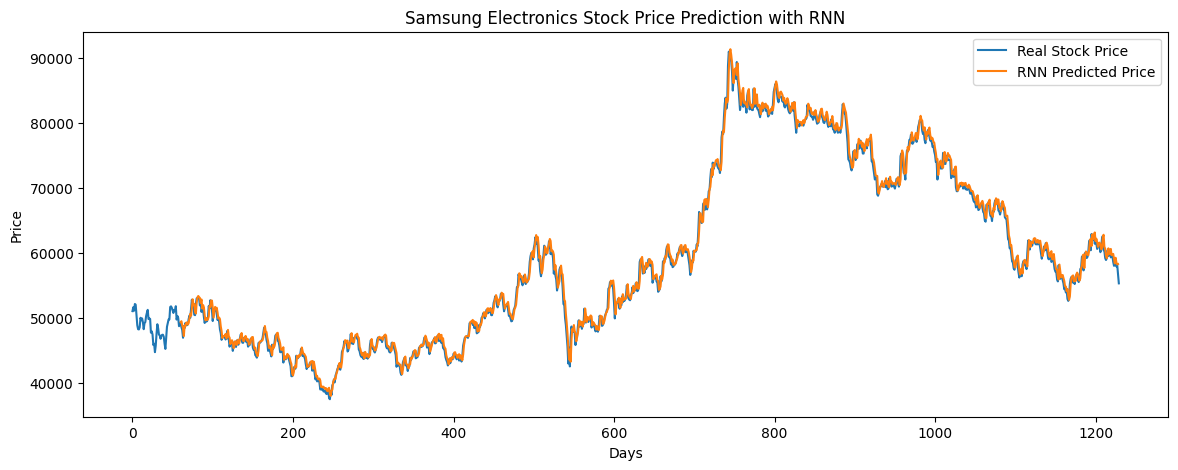

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

# 삼성전자 데이터 가져오기
ticker = '005930.KS'
data = yf.download(ticker, start='2018-01-01', end='2023-01-01')
close_data = data['Close'].values  # 종가만 추출

# 데이터 전처리 (정규화)
scaler = MinMaxScaler(feature_range=(0, 1))
close_data = scaler.fit_transform(close_data.reshape(-1, 1))

# 시퀀스 데이터 생성
def create_dataset(dataset, time_step=60):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 60
X, Y = create_dataset(close_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)  # RNN 입력 형식에 맞게 재구성

# RNN 모델 구성
model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(time_step, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# 모델 학습
model.fit(X, Y, epochs=50, batch_size=32, verbose=1)

# 예측 및 결과 시각화
train_predict = model.predict(X)
train_predict = scaler.inverse_transform(train_predict)  # 정규화 복원
original_data = scaler.inverse_transform(close_data)

# 예측 결과 시각화
plt.figure(figsize=(14, 5))
plt.plot(original_data, label='Real Stock Price')
plt.plot(np.arange(time_step, time_step + len(train_predict)), train_predict, label='RNN Predicted Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Samsung Electronics Stock Price Prediction with RNN')
plt.legend()
plt.show()


## 향후 예측

In [ ]:
# 미래 예측을 위한 설정
future_days = 30  # 예측하고자 하는 일수
future_predictions = []

# 가장 최근 시퀀스를 기반으로 미래 예측 시작
last_sequence = close_data[-time_step:]  # 가장 최근의 시퀀스
last_sequence = last_sequence.reshape(1, time_step, 1)

# 시퀀스 데이터의 차원에 맞게 배열 차원 조정
for _ in range(future_days):
    next_prediction = model.predict(last_sequence)  # 다음 날 예측
    future_predictions.append(next_prediction[0, 0])  # 예측 결과 저장

    # 예측 결과의 차원을 last_sequence와 맞추어 업데이트
    next_prediction = next_prediction.reshape(1, 1, 1)  # (배치 크기, 시퀀스 길이, 피처 수)로 변환
    last_sequence = np.append(last_sequence[:, 1:, :], next_prediction, axis=1)

# 예측된 미래 주가를 원래 값으로 복원
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# 결과 시각화 (실제 데이터 + 미래 예측)
plt.figure(figsize=(14, 5))
plt.plot(scaler.inverse_transform(close_data), label='Real Stock Price')  # 실제 데이터
plt.plot(np.arange(len(close_data), len(close_data) + future_days), future_predictions, label='Future Prediction')  # 미래 예측 데이터
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Samsung Electronics Stock Price Prediction (Future)')
plt.legend()
plt.show()


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)             │ (None, 50)                  │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0478
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0023
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.8082e-04
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.4919e-04
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0011
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.9629e-04
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.7996e-04
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0010
Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.6199e-04
Epoch 10/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.2762e-04
Epoch 11/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.7297e-04
Epoch 12/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.4160e-04
Epoch 13/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.4180e-04
Epoch 14/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.5674e-04
Epoch 15/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9m

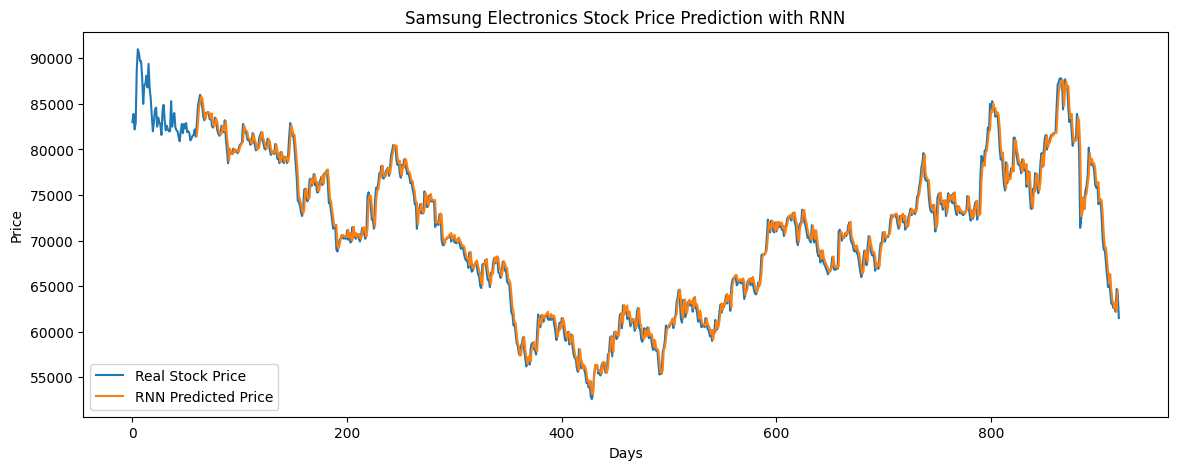

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

# 삼성전자 데이터 가져오기
ticker = '005930.KS'
data = yf.download(ticker, start='2021-01-01', end='2024-10-01')
close_data = data['Close'].values  # 종가만 추출

# 데이터 전처리 (정규화)
scaler = MinMaxScaler(feature_range=(0, 1))
close_data = scaler.fit_transform(close_data.reshape(-1, 1))

# 시퀀스 데이터 생성
def create_dataset(dataset, time_step=60):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 60
X, Y = create_dataset(close_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)  # RNN 입력 형식에 맞게 재구성

# RNN 모델 구성
model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(time_step, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# 모델 학습
model.fit(X, Y, epochs=50, batch_size=32, verbose=1)

# 예측 및 결과 시각화
train_predict = model.predict(X)
train_predict = scaler.inverse_transform(train_predict)  # 정규화 복원
original_data = scaler.inverse_transform(close_data)

# 예측 결과 시각화
plt.figure(figsize=(14, 5))
plt.plot(original_data, label='Real Stock Price')
plt.plot(np.arange(time_step, time_step + len(train_predict)), train_predict, label='RNN Predicted Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Samsung Electronics Stock Price Prediction with RNN')
plt.legend()
plt.show()


In [ ]:
# 미래 예측을 위한 설정
future_days = 30  # 예측하고자 하는 일수
future_predictions = []

# 가장 최근 시퀀스를 기반으로 미래 예측 시작
last_sequence = close_data[-time_step:]  # 가장 최근의 시퀀스
last_sequence = last_sequence.reshape(1, time_step, 1)

# 시퀀스 데이터의 차원에 맞게 배열 차원 조정
for _ in range(future_days):
    next_prediction = model.predict(last_sequence)  # 다음 날 예측
    future_predictions.append(next_prediction[0, 0])  # 예측 결과 저장

    # 예측 결과의 차원을 last_sequence와 맞추어 업데이트
    next_prediction = next_prediction.reshape(1, 1, 1)  # (배치 크기, 시퀀스 길이, 피처 수)로 변환
    last_sequence = np.append(last_sequence[:, 1:, :], next_prediction, axis=1)

# 예측된 미래 주가를 원래 값으로 복원
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# 결과 시각화 (실제 데이터 + 미래 예측)
plt.figure(figsize=(14, 5))
plt.plot(scaler.inverse_transform(close_data), label='Real Stock Price')  # 실제 데이터
plt.plot(np.arange(len(close_data), len(close_data) + future_days), future_predictions, label='Future Prediction')  # 미래 예측 데이터
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Samsung Electronics Stock Price Prediction (Future)')
plt.legend()
plt.show()


코스닥 종목

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_4 (SimpleRNN)             │ (None, 50)                  │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2103
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0099
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0032
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0032
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0031
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0023
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0025
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0023
Epoch 9/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0020
Epoch 10/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0021
Epoch 11/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0023
Epoch 12/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0020
Epoch 13/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0023
Epoch 14/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0022
Epoch 15/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0020
Epoch 16/50
21/21 

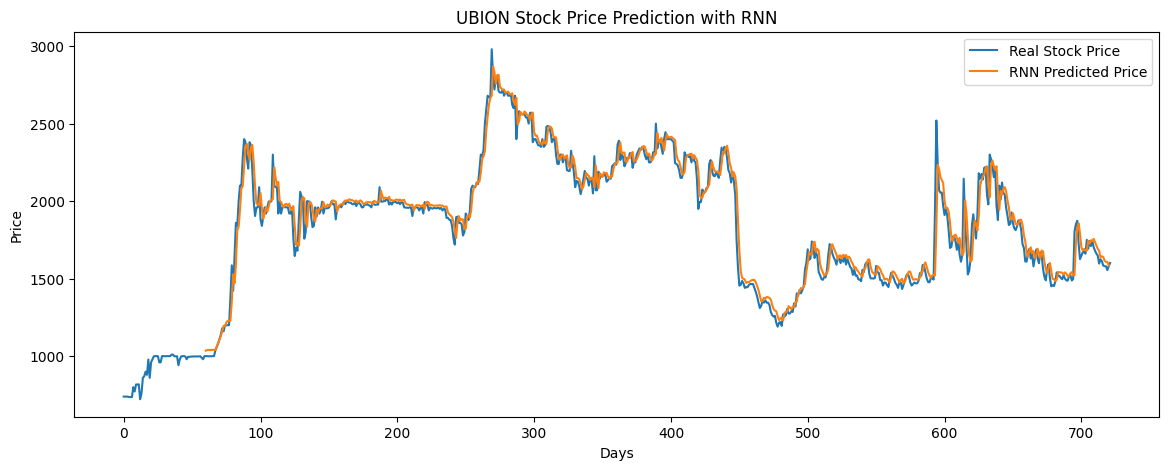

In [8]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

# UBION 데이터 가져오기
ticker = '084440.KQ'
data = yf.download(ticker, start='2021-01-01', end='2023-12-31')
close_data = data['Close'].values  # 종가만 추출

# 데이터 전처리 (정규화)
scaler = MinMaxScaler(feature_range=(0, 1))
close_data = scaler.fit_transform(close_data.reshape(-1, 1))

# 시퀀스 데이터 생성
def create_dataset(dataset, time_step=60):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 60
X, Y = create_dataset(close_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)  # RNN 입력 형식에 맞게 재구성

# RNN 모델 구성
model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(time_step, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# 모델 학습
model.fit(X, Y, epochs=50, batch_size=32, verbose=1)

# 예측 및 결과 시각화
train_predict = model.predict(X)
train_predict = scaler.inverse_transform(train_predict)  # 정규화 복원
original_data = scaler.inverse_transform(close_data)

# 예측 결과 시각화
plt.figure(figsize=(14, 5))
plt.plot(original_data, label='Real Stock Price')
plt.plot(np.arange(time_step, time_step + len(train_predict)), train_predict, label='RNN Predicted Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('UBION Stock Price Prediction with RNN')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━

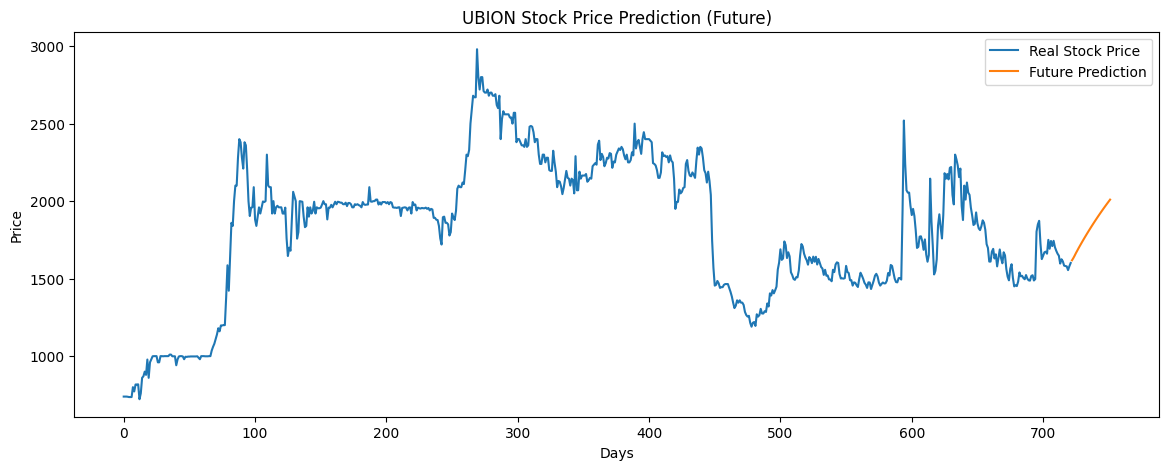

In [9]:
# 미래 예측을 위한 설정
future_days = 30  # 예측하고자 하는 일수
future_predictions = []

# 가장 최근 시퀀스를 기반으로 미래 예측 시작
last_sequence = close_data[-time_step:]  # 가장 최근의 시퀀스
last_sequence = last_sequence.reshape(1, time_step, 1)

# 시퀀스 데이터의 차원에 맞게 배열 차원 조정
for _ in range(future_days):
    next_prediction = model.predict(last_sequence)  # 다음 날 예측
    future_predictions.append(next_prediction[0, 0])  # 예측 결과 저장

    # 예측 결과의 차원을 last_sequence와 맞추어 업데이트
    next_prediction = next_prediction.reshape(1, 1, 1)  # (배치 크기, 시퀀스 길이, 피처 수)로 변환
    last_sequence = np.append(last_sequence[:, 1:, :], next_prediction, axis=1)

# 예측된 미래 주가를 원래 값으로 복원
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# 결과 시각화 (실제 데이터 + 미래 예측)
plt.figure(figsize=(14, 5))
plt.plot(scaler.inverse_transform(close_data), label='Real Stock Price')  # 실제 데이터
plt.plot(np.arange(len(close_data), len(close_data) + future_days), future_predictions, label='Future Prediction')  # 미래 예측 데이터
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('UBION Stock Price Prediction (Future)')
plt.legend()
plt.show()
